##**Load libraries**

In [3]:
#Importing the neccessay libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# Libraries to tune model, get different metric scores, and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics
# Library to impute missing values
from sklearn.impute import KNNImputer
# Library to build a logistic regression model
from sklearn.linear_model import LogisticRegression
# Library to supress the warning
import warnings
warnings.filterwarnings('ignore')

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier





#**Load dataset**

In [4]:
#Importing the dataset for our project
Bank_D=pd.read_csv('BankChurners.csv')
Bank_D

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0      768805383  Existing Customer  ...                1.625                 0.061
1      818770008  Existing Customer  ...                3.714                 0.105
2      713982108  Existing Customer  ...                2.333                 0.000
3      769911858  Existing Customer  ...                2.333                 0.760
4      709106358  Existing Customer  ...                2.500                 0.000
...          ...                ...  ...                  ...                   ...
10122  772366833  Existing Customer  ...                0.857                 0.462
10123  710638233  Attrited Customer  ...                0.683                 0.511
10124  716506083  Attrited Customer  ...                0.818                 0.000
10125  717406983  Attrited Customer  ...                0.722                 0.000
10126  714337233  Attrited Customer  ...                0.649                 0.189

[10127 rows x 21 columns]

#**Summarize Data**

###**Dimensions of Dataset**

In [5]:
#Check the shape of the dataset
print(Bank_D.shape)

(10127, 21)


* The dataset consist of 10127 rows and 21 columns.

In [6]:
#Check the columns
print(list(Bank_D.columns))

['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [7]:
#Let's check the first 10 rows of the dataset
Bank_D.head(10)

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0  768805383  Existing Customer  ...                1.625                 0.061
1  818770008  Existing Customer  ...                3.714                 0.105
2  713982108  Existing Customer  ...                2.333                 0.000
3  769911858  Existing Customer  ...                2.333                 0.760
4  709106358  Existing Customer  ...                2.500                 0.000
5  713061558  Existing Customer  ...                0.846                 0.311
6  810347208  Existing Customer  ...                0.722                 0.066
7  818906208  Existing Customer  ...                0.714                 0.048
8  710930508  Existing Customer  ...                1.182                 0.113
9  719661558  Existing Customer  ...                0.882                 0.144

[10 rows x 21 columns]

In [8]:
#Print the last 5 rows of our dataset
Bank_D.tail()

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
10122  772366833  Existing Customer  ...                0.857                 0.462
10123  710638233  Attrited Customer  ...                0.683                 0.511
10124  716506083  Attrited Customer  ...                0.818                 0.000
10125  717406983  Attrited Customer  ...                0.722                 0.000
10126  714337233  Attrited Customer  ...                0.649                 0.189

[5 rows x 21 columns]

In [9]:
#Now let's check the information about the data enries
Bank_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* This data consist of 10127 observations and 21 features.
* The information of the shows that, our data consist of three datatypes. Interger-10, Float-6 and Object(Categorical)-5.
* We can see we have no missing values in our dataset. Let's continue exploring the dataset.

* The nunique shows the unique values of all the attribute. We can see that **CLIENTNUM** is the unique ID for each rows(Observations). And since it will not add any value into our modelling, then we drop it.

In [10]:
#Now we can drop the **CLIENTNUM** 
Bank_D.drop(columns=['CLIENTNUM'], inplace= True)

In [11]:
#Print the first 5rows of new dataset
Bank_D.head()

Attrition_Flag  Customer_Age  ... Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
0  Existing Customer            45  ...               1.625                  0.061
1  Existing Customer            49  ...               3.714                  0.105
2  Existing Customer            51  ...               2.333                  0.000
3  Existing Customer            40  ...               2.333                  0.760
4  Existing Customer            40  ...               2.500                  0.000

[5 rows x 20 columns]

In [12]:
#Now let's check the unique values in each column
Bank_D.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

###**Descriptive statistics**

In [13]:
Bank_D.describe().T

count         mean  ...        75%        max
Customer_Age              10127.0    46.325960  ...     52.000     73.000
Dependent_count           10127.0     2.346203  ...      3.000      5.000
Months_on_book            10127.0    35.928409  ...     40.000     56.000
Total_Relationship_Count  10127.0     3.812580  ...      5.000      6.000
Months_Inactive_12_mon    10127.0     2.341167  ...      3.000      6.000
Contacts_Count_12_mon     10127.0     2.455317  ...      3.000      6.000
Credit_Limit              10127.0  8631.953698  ...  11067.500  34516.000
Total_Revolving_Bal       10127.0  1162.814061  ...   1784.000   2517.000
Avg_Open_To_Buy           10127.0  7469.139637  ...   9859.000  34516.000
Total_Amt_Chng_Q4_Q1      10127.0     0.759941  ...      0.859      3.397
Total_Trans_Amt           10127.0  4404.086304  ...   4741.000  18484.000
Total_Trans_Ct            10127.0    64.858695  ...     81.000    139.000
Total_Ct_Chng_Q4_Q1       10127.0     0.712222  ...      0.818      3.714
Avg_Utilization_Ratio     10127.0     0.274894  ...      0.503      0.999

[14 rows x 8 columns]

####**Observation**
* `Customer_Age` 
  * The average age of the customers is 46yrs.
  * The min age of the customer is 26yrs and the maximum is 73yrs
  * About 25%(First interquatile) of the customer has age their age less than 41yrs and about 75% of the customer has their age less than 52yrs.
* `Dependent_Count`
  * The average dependent for all the customers is 2. There is no customers without any dependent. 
  * The maximum number of the dependent of the customers is 5. i.e The highest number of dependent which Thera bank customers got is 5.
* `Months_On_Book` 
  * The average months customers joined the bank is 35months. The minimum is 13months and the maximum is 56months.
* `Total_Relationship_Count`
  * The average products held by the customer is 4products. Some customer has just one product. The highest product help by customer is 6. 
  * About 25% of the customer has less than 3 products and 75% has less than 6product.

* `Months_Inactive`
  *  The average inactive months of some customers within 12months is just 2months. The maximum is 6months.
* `Contacts_Counts_12_mon`
  *  The average number of contacts the bank have with the customers in last 12months is 2 and the maximum is 6.
  * About 75% of the customers has less than 3contacts with the bank(Many of the customers rarely comes to the bank. 
* `Credit_Limit`
  * The average credit limit on cerdit card is 4549.000. 
  * We can see we have an outliers in within the value. We will check this later when we visualize the data.
  * The minimum  amount in the credit card is 1438.3 
  * The maximum amount in the credit card is 34516.000. We can investigate this value later. 
* `Total_Revolving_Bal`
  * There is no minimum revolving balance. There is always revolving balance at the end of everymonth carries to the next month.
  * The maximum revolving balance is 2517.00
* ` Avg_Open_To_Buy`
  * There is an outlier in this values.
  * The average amount that's open to buy by the customer int the last 12mount is 3474.
* `Total_Amot_Chng_Q4_Q1`
 * The Average change in transaction amount is 0.736 and the maximum is 3.397.
* ` Total_Trans_Amt`
  * Present of outliers. Th.e data is rightly skwed 
  * The average transaction amount in last 12months is 3899.00. 
  * The minimum is 510. and the maximum is 18484.
* `Total_Trans_ct`
  * This is slidely skewed. The minimum transaction made in the last 12months is 10 transactions and the maximum is 139.00. 
  * The average transaction made is 67 made transactions.
* ` Total_Ct_Cgng_Q1`
  * The average change change in transaction 0.7. The maximum time change in transaction occured is 3times.
* `Avg_Utilization_Ratio`
  * Avg_Utilization_Ratio is the amount currently owe divided by credit limit. So the average _Utilization_Ratio is 0.176(2%).



In [14]:
#Let's check the skweed points.

Bank_D.skew()

Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

* We have many skwed values in our dataset. We will deal with it when preprocessing or data.

## **Data preprocessing** 

In [15]:
#Let's check if our dataset has missing datas
Bank_D.isnull().any()

Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

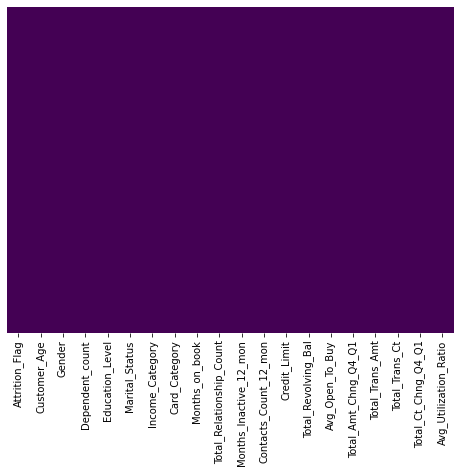

In [16]:
#Let's view the data missing columns with heat map.
plt.figure(figsize=(8,6))
sns.heatmap(Bank_D.isnull(),cmap='viridis',cbar=False, yticklabels=False);

* We have a clean dataset for this project. No mising value. 

###  **Now let's check the count of each unique category in each of the categorical variables**

In [17]:
Cat_Col= ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

#printing the number of count of unique value in each column
for column in Cat_Col:
  print(Bank_D[column].value_counts())
  print('-'*40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


**Obsevations**
* The existing customers is more than the attrited customers.
* Larger number of females customers than the male customesrs.
* Many of the customers are young graduates. There are few number of doctorate amongt the customers.
* Many of the customers monthly income is less than $40.
* And for the card_category, many of the customers has blue cad type.
* Most of the customers are married. And there are 749 customers which marital status is unknown.



##**Data Visualizations**

In [18]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=Bank_D)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

###**Univariate Analysis**
We start our data with categorical features. Finding the percentage of the  each categorical features.

While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.

In [19]:
#Now let's count the value of customers existing or attrited in the bank
Bank_D['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

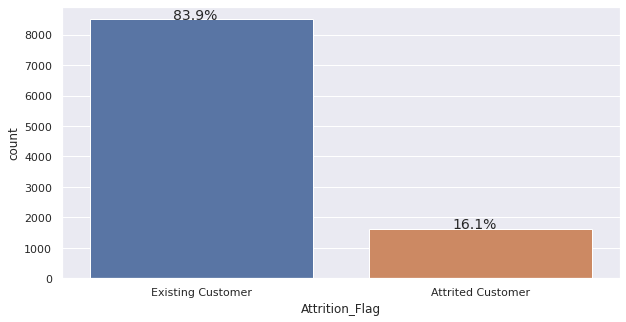

In [20]:
#observation from the target
perc_on_bar(Bank_D['Attrition_Flag'])

**Observation**: 
* The percentage of the existing customers is more than customers who are churned. 84% of existing customers and 16% for churn customers.
* We see that this dataset is highly imbalanced. 

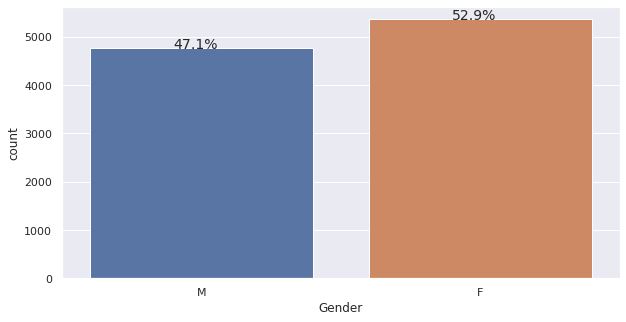

In [21]:
#observation from the Gender of the  customers 
perc_on_bar(Bank_D['Gender'])

**Insight**: There is more of the female customers than the male customers.
52.9% are female and 47.1%  are male.

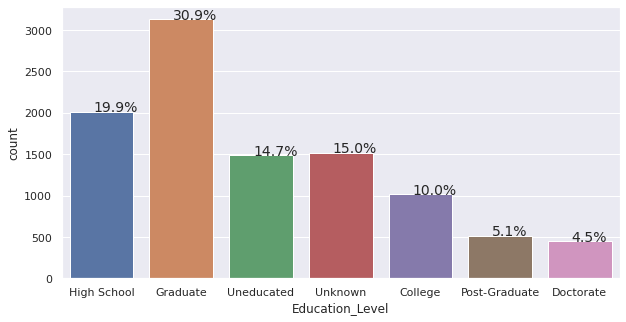

In [22]:
#observation from the target
perc_on_bar(Bank_D['Education_Level'])

**Insight**: Majority of the customers are graduate and the customers are doctorate.

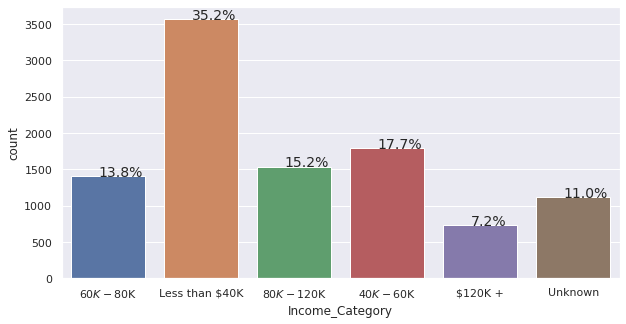

In [23]:
#observation from the target
perc_on_bar(Bank_D['Income_Category'])

**Insight**: Customers that earns above 120-dollars annually is 7.2%. Majority  of the customers earn below 40-dollars.

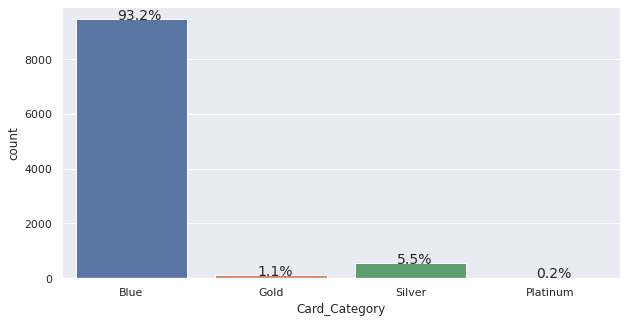

In [24]:
#observation from the target
perc_on_bar(Bank_D['Card_Category'])

**Observation**
  *  Few customers has platinum card which 0.2%.
  *  1.1% of people has Gold card.
  * Larger pecentange of the customers has blue card.

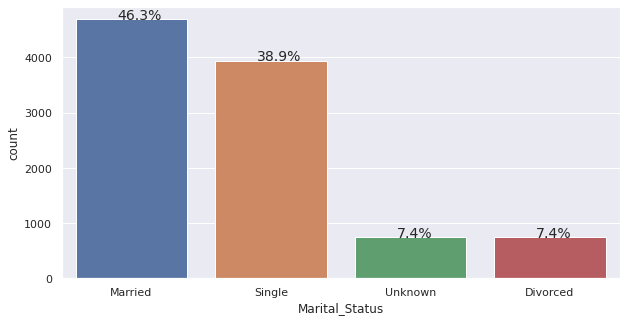

In [25]:
#observation from the target
perc_on_bar(Bank_D['Marital_Status'])

In [26]:
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=40, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

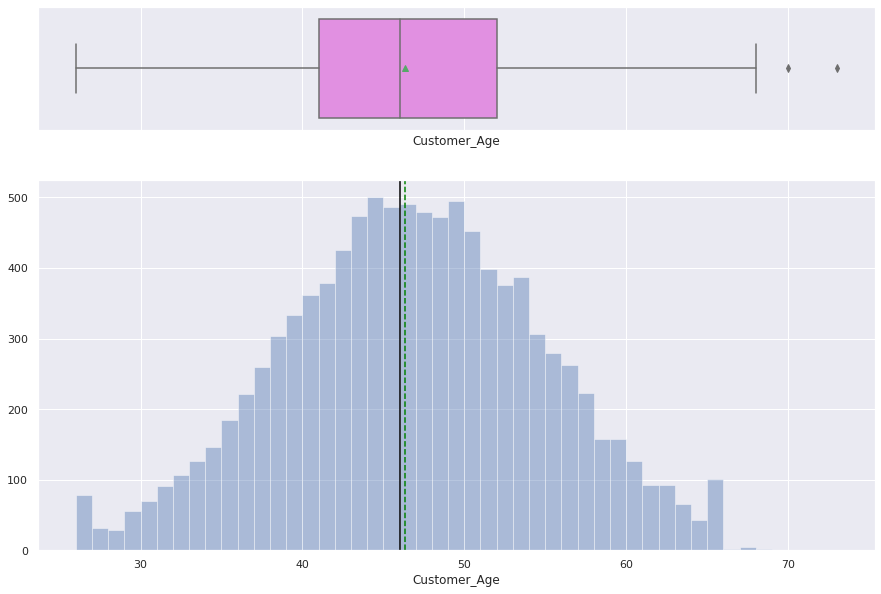

In [27]:
# Observations on Customer_age
histogram_boxplot(Bank_D["Customer_Age"])

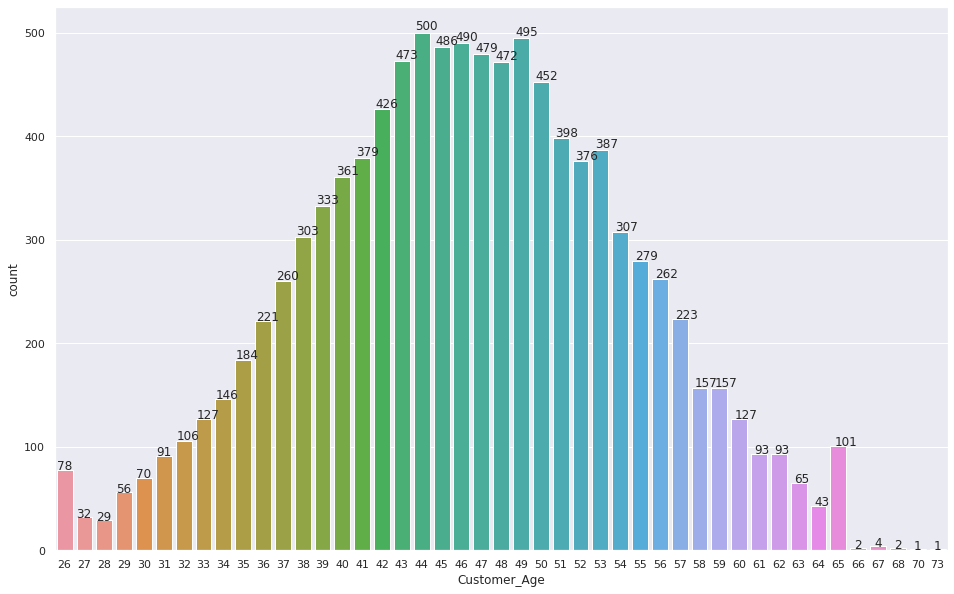

In [28]:
plt.figure(figsize = (16, 10))
#plt.title('Customer_Age)
ax = sns.countplot(data = Bank_D, x = 'Customer_Age')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**Observation from Customers_Age plots**

- As per the boxplot, there is an outliers in 'Customer_Age' variable
- Age has a fairly normal distribution distribution with approx equal mean and median.
- Many customers with credit card have their age is between 42 to 50. 

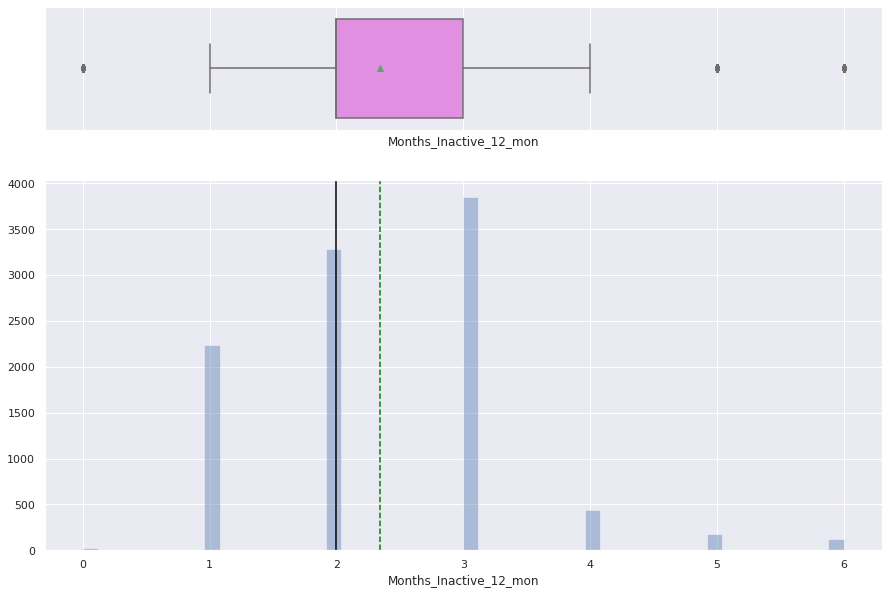

In [29]:
# Observations on Customer_age
histogram_boxplot(Bank_D["Months_Inactive_12_mon"])

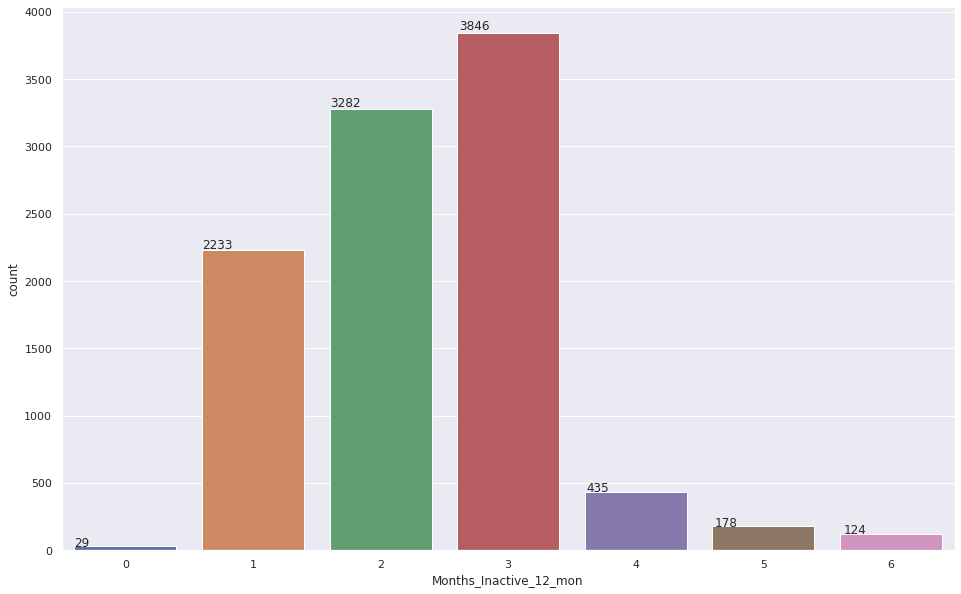

In [30]:
plt.figure(figsize = (16, 10))
#plt.title('Number of Customers holding the card for months')
ax = sns.countplot(data = Bank_D, x = 'Months_Inactive_12_mon')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**Observations**

- As per the boxplot, there is an outliers in the dataset.
- The highest month customers were inactive is 3months. 3846 ustomers are inactive for three months in the past 12months.
- 124 were inactive for 5months.

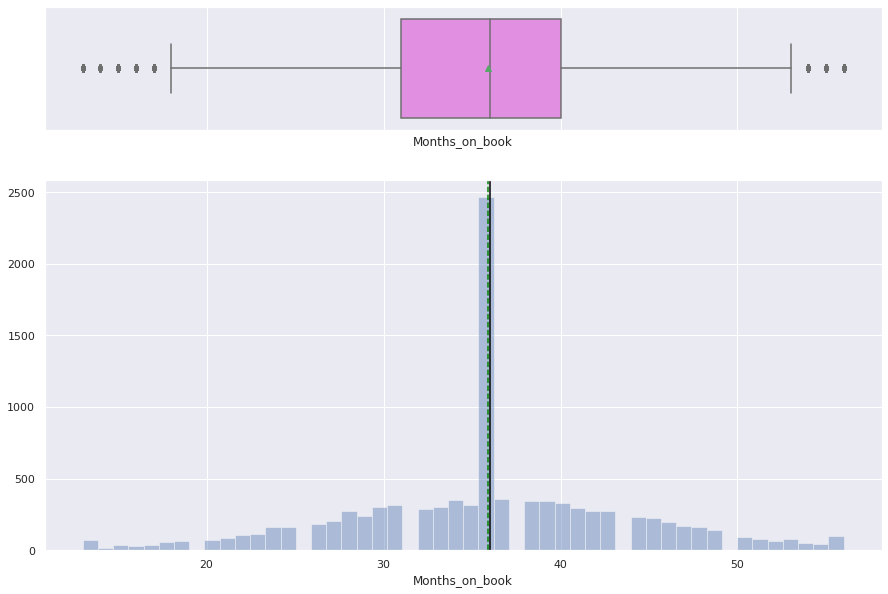

In [31]:
# Observations on Customer_age
histogram_boxplot(Bank_D["Months_on_book"])

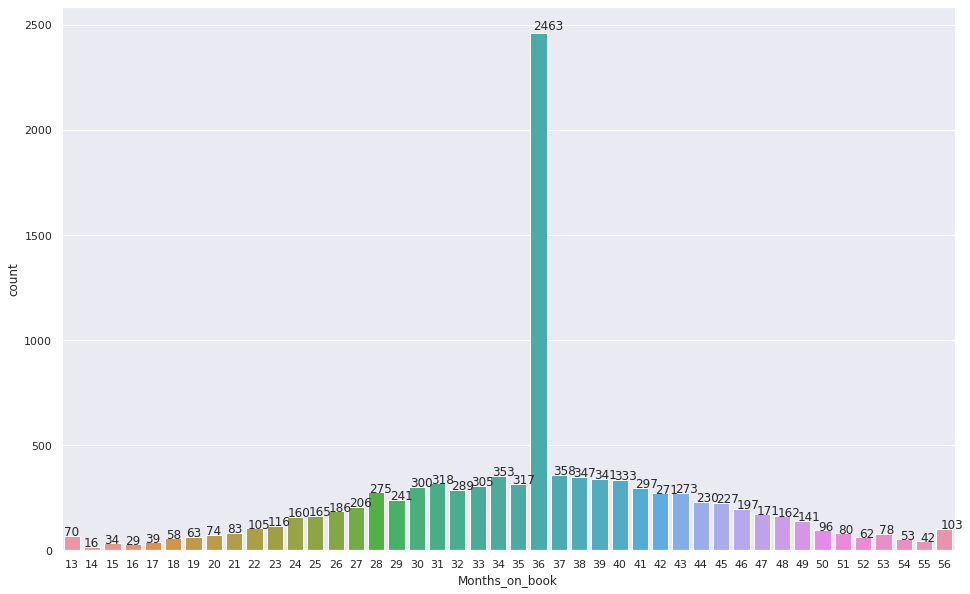

In [32]:
plt.figure(figsize = (16, 10))
#plt.title('Number of Customers holding the card for months')
ax = sns.countplot(data = Bank_D, x = 'Months_on_book')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**Observation**

- As per the boxplot, there is an outliers in 'Months_on_book' variable
- It has a fairly normal distribution with approx equal mean and median. 
- Many of customers have been transacting with the bank for 3years. About 2463 customers belong to this category.

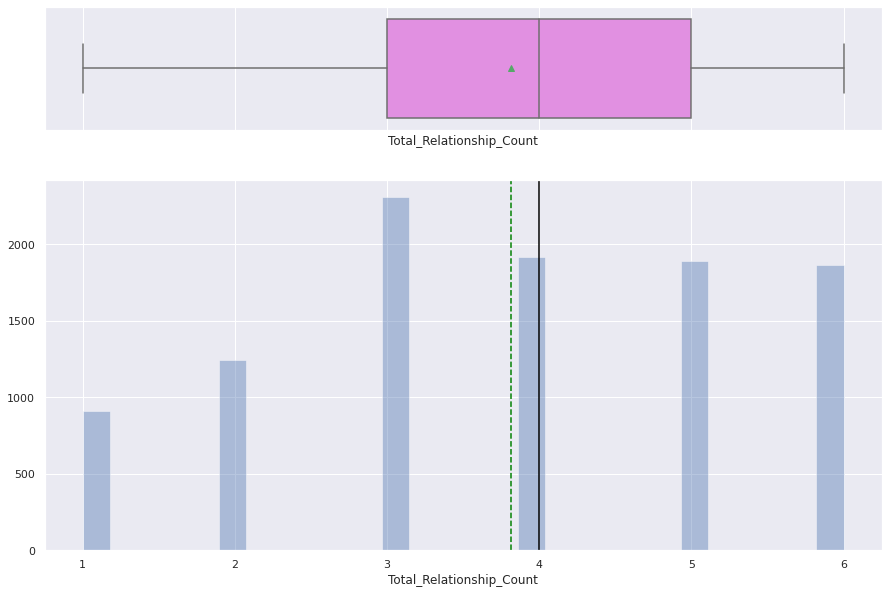

In [33]:
# Observations on Customer_age
histogram_boxplot(Bank_D["Total_Relationship_Count"])

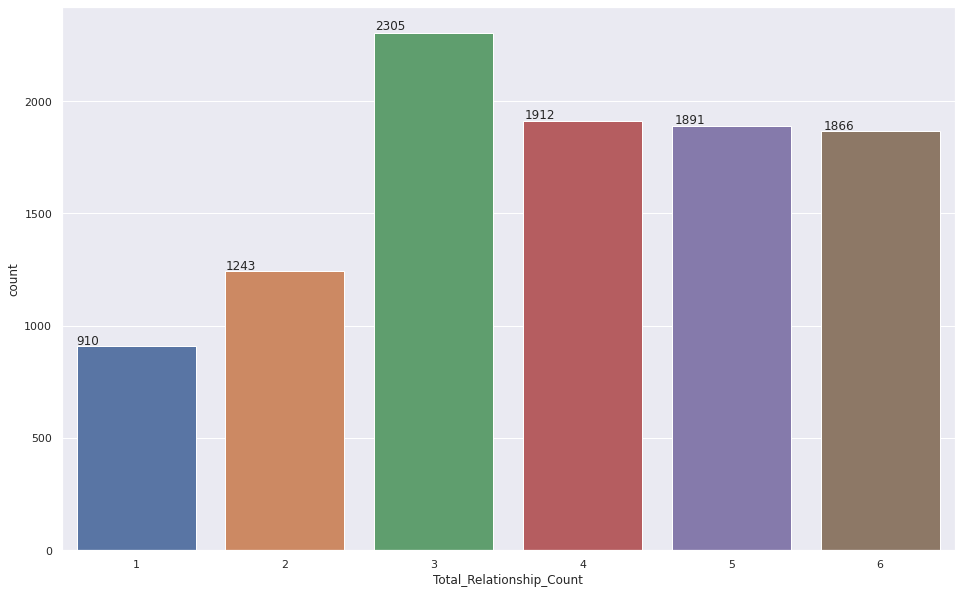

In [34]:
plt.figure(figsize = (16, 10))
#plt.title('Number of Customers holding the card for months')
ax = sns.countplot(data = Bank_D, x = 'Total_Relationship_Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**Observation**

- As per the boxplot, there is an outliers.The variable skewed both left and right. That's the dataset positively skewed to the right and negatively skewed to the left.
- Majority of the cusomers have taken about 3 products from the bank, which credit card is is one of them.
- 910 customers took 1 product.
-3201 customers to 3 product.
-1866 customers has 6 products
-There is no outliers in the dataset.

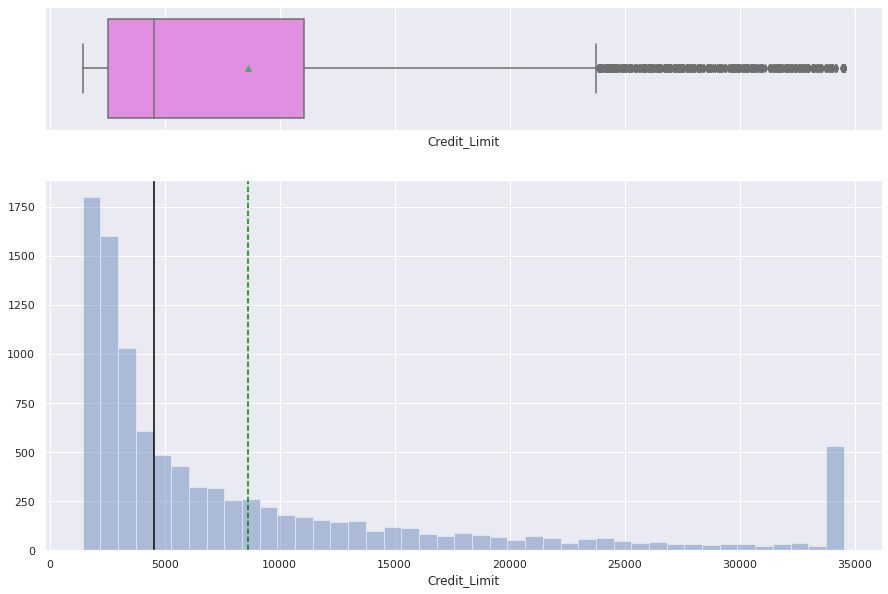

In [35]:
# Observations on Customer_age
histogram_boxplot(Bank_D["Credit_Limit"])

**Observation**

- Rightly skewed dataset.
-  The average mean and median are different. 
- Some of the customers credit limit over $3,500 . Customers fall into this category might be customer with gold or platinum card. We can investigate tis further.

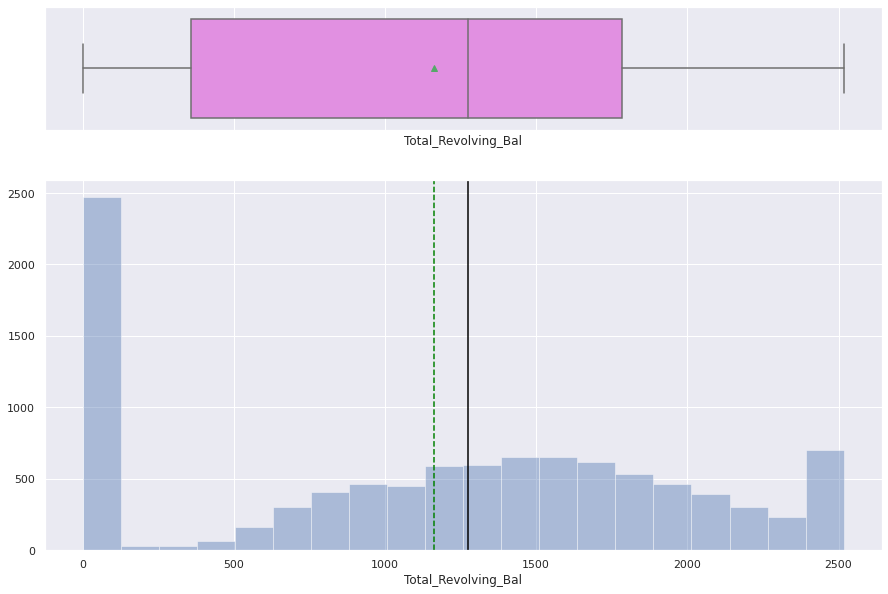

In [36]:
# Observations on Customer_age
histogram_boxplot(Bank_D["Total_Revolving_Bal"])

- The distribution for the Total_Revolving_Bal seems normally distributed, but there is a little skewed of the data to the left. 
-We have no outliers in the variable.
-Approx $2,500 customers donot have 'Total_Revolving_Bal' in their cards.

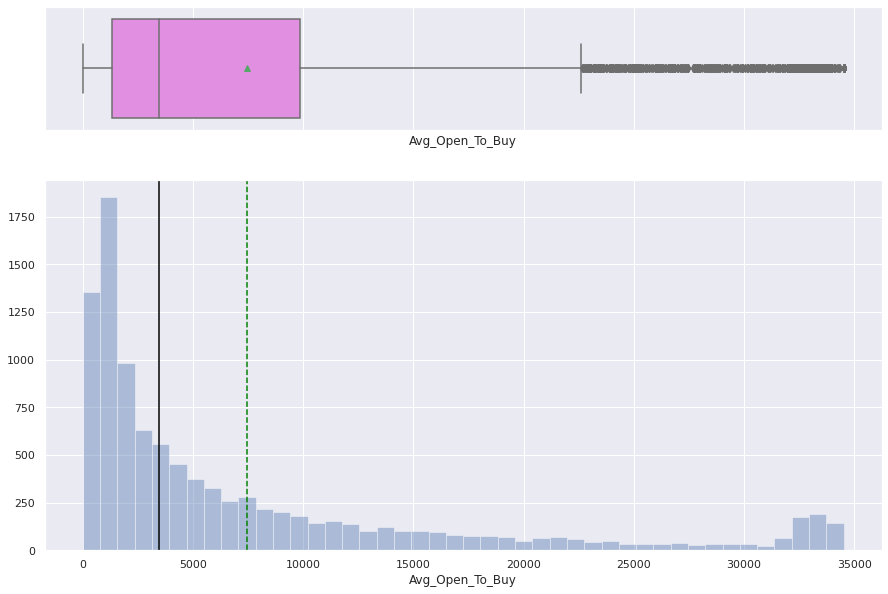

In [37]:
# Observations on Customer_age
histogram_boxplot(Bank_D["Avg_Open_To_Buy"])

* Avg_Open_To_Buy variable is rightly skewed.

* There is present of out outliers in the dataset. 

* Amount open to buy for customers are varies. Average open amount to many customers are between 0-5000. Few of the customers can be allow to take a credit card over 5000.

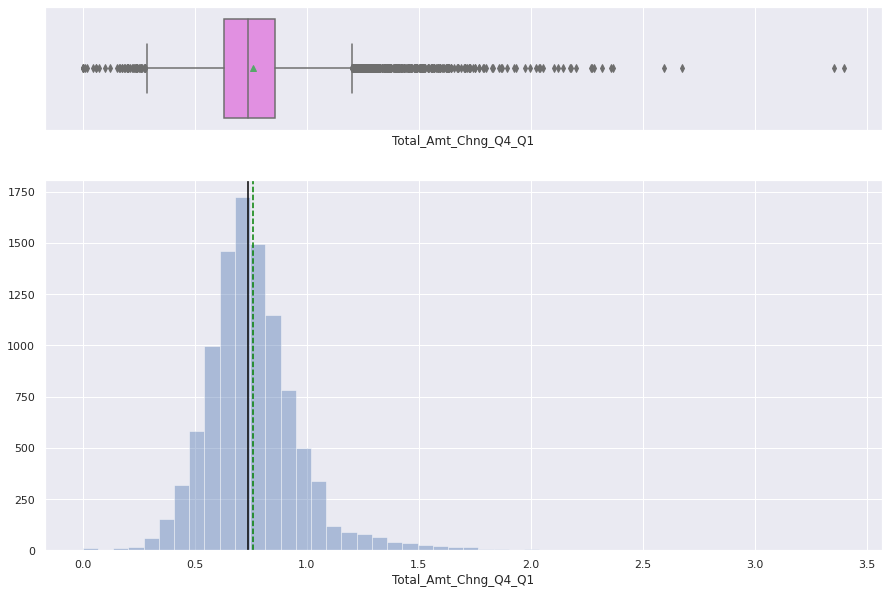

In [39]:
# Observations on Customer_age
histogram_boxplot(Bank_D['Total_Amt_Chng_Q4_Q1'])

* The distribution is normally distributed
* Outliers both at the right and the left of the distribution.
* The average mean and the madian are the same. 
* About 80% of time customers changed their transactions. 


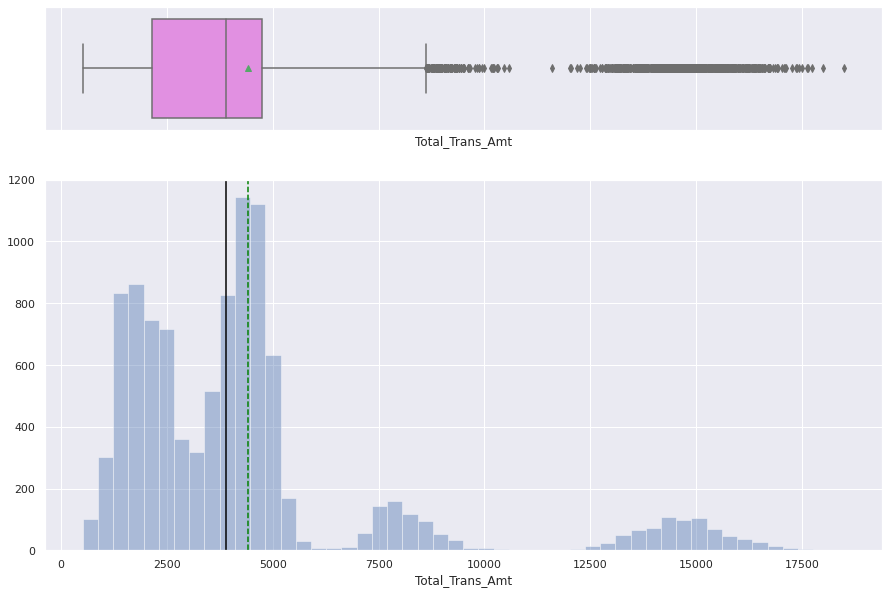

In [40]:
# Observations on Customer_age
histogram_boxplot(Bank_D['Total_Trans_Amt'])


* Total transactions amount varies, That is why there are so many skewness in our dataset. The distributions is skewed to the right.
* Since the amount open ti buy for many customers is between 0-5000, then many transaction made are between 0 and 5000.

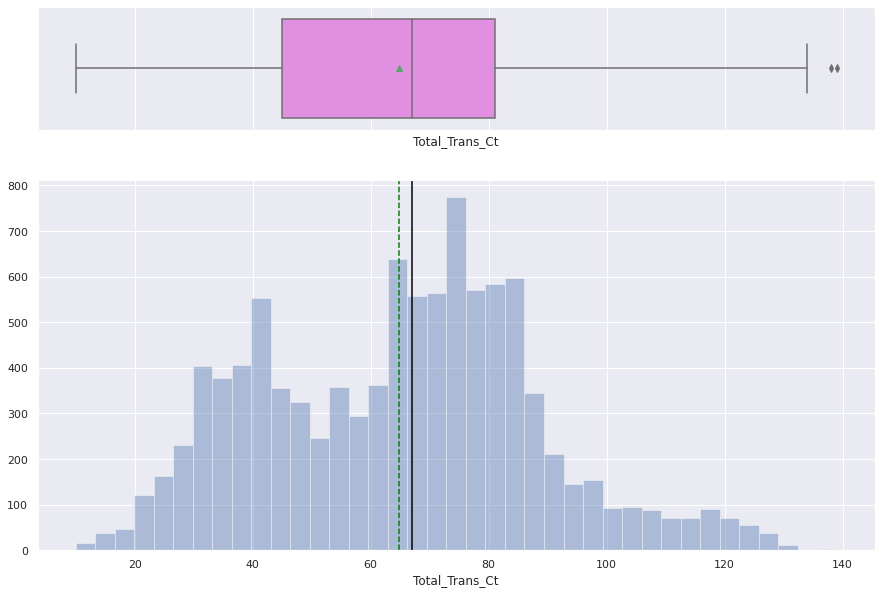

In [41]:
# Observations on Customer_age
histogram_boxplot(Bank_D['Total_Trans_Ct'])

- Totall_Trans_Ct distribution seems normaly distributed but there is still a present of outliers.
- The highest transactions made is between 60 to 80 transactions.

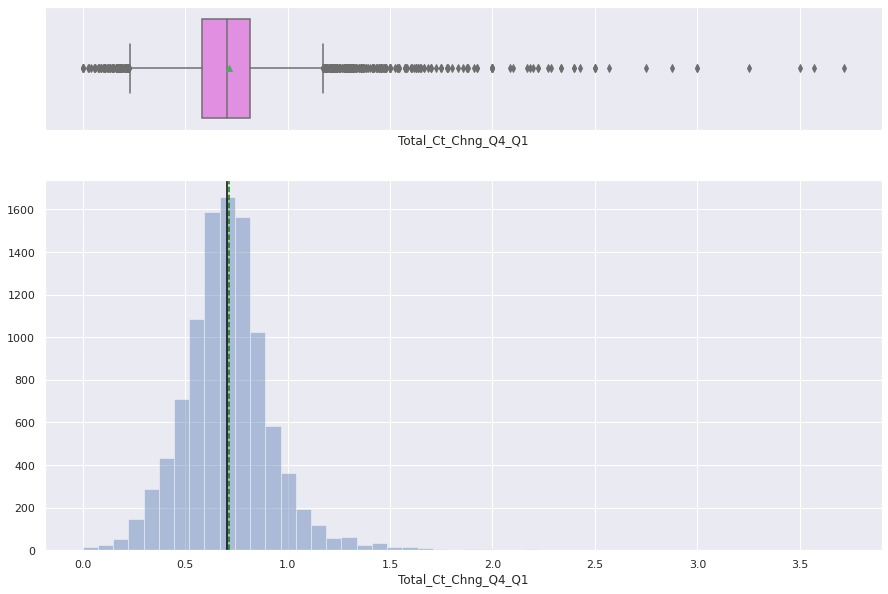

In [42]:
# Observations on Customer_age
histogram_boxplot(Bank_D['Total_Ct_Chng_Q4_Q1'])

- Normally distributed variable with outliers.
- About 60% of the transactions counts were changed.

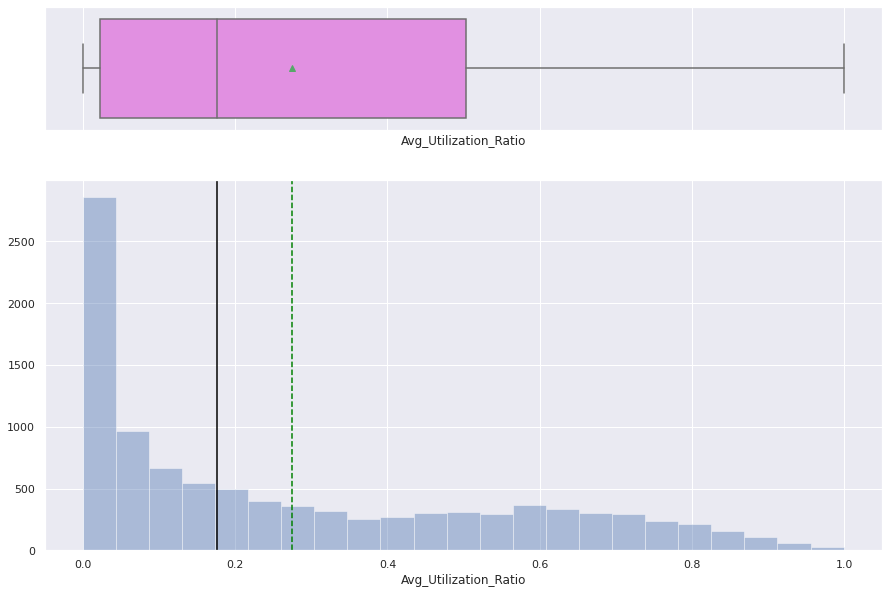

In [43]:
# Observations on Customer_age
histogram_boxplot(Bank_D['Avg_Utilization_Ratio'])

* No outliers in the ditribution.

##**Bivariate Analysis**

Bivariate Analysis is one of the simplest forms of quatitative analysis. It's involves analysis of two varaibles(X,Y), for the purpose of determining the empirical relatinship between them.

In [44]:
#Let's print the correlation matrix table of the numerical features
Bank_D.corr()

Customer_Age  ...  Avg_Utilization_Ratio
Customer_Age                  1.000000  ...               0.007114
Dependent_count              -0.122254  ...              -0.037135
Months_on_book                0.788912  ...              -0.007541
Total_Relationship_Count     -0.010931  ...               0.067663
Months_Inactive_12_mon        0.054361  ...              -0.007503
Contacts_Count_12_mon        -0.018452  ...              -0.055471
Credit_Limit                  0.002476  ...              -0.482965
Total_Revolving_Bal           0.014780  ...               0.624022
Avg_Open_To_Buy               0.001151  ...              -0.538808
Total_Amt_Chng_Q4_Q1         -0.062042  ...               0.035235
Total_Trans_Amt              -0.046446  ...              -0.083034
Total_Trans_Ct               -0.067097  ...               0.002838
Total_Ct_Chng_Q4_Q1          -0.012143  ...               0.074143
Avg_Utilization_Ratio         0.007114  ...               1.000000

[14 rows x 14 columns]

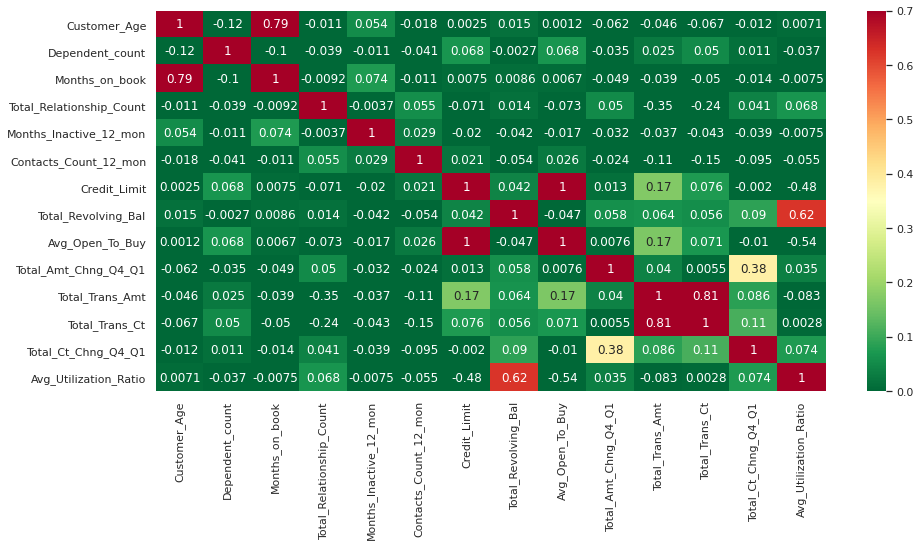

In [45]:
#Plotting the correlation matrix in the heatmap.
plt.figure(figsize=(15,7))
corr= Bank_D.corr()
sns.heatmap(corr,annot= True,vmin=0,vmax=0.7, cmap='RdYlGn_r')

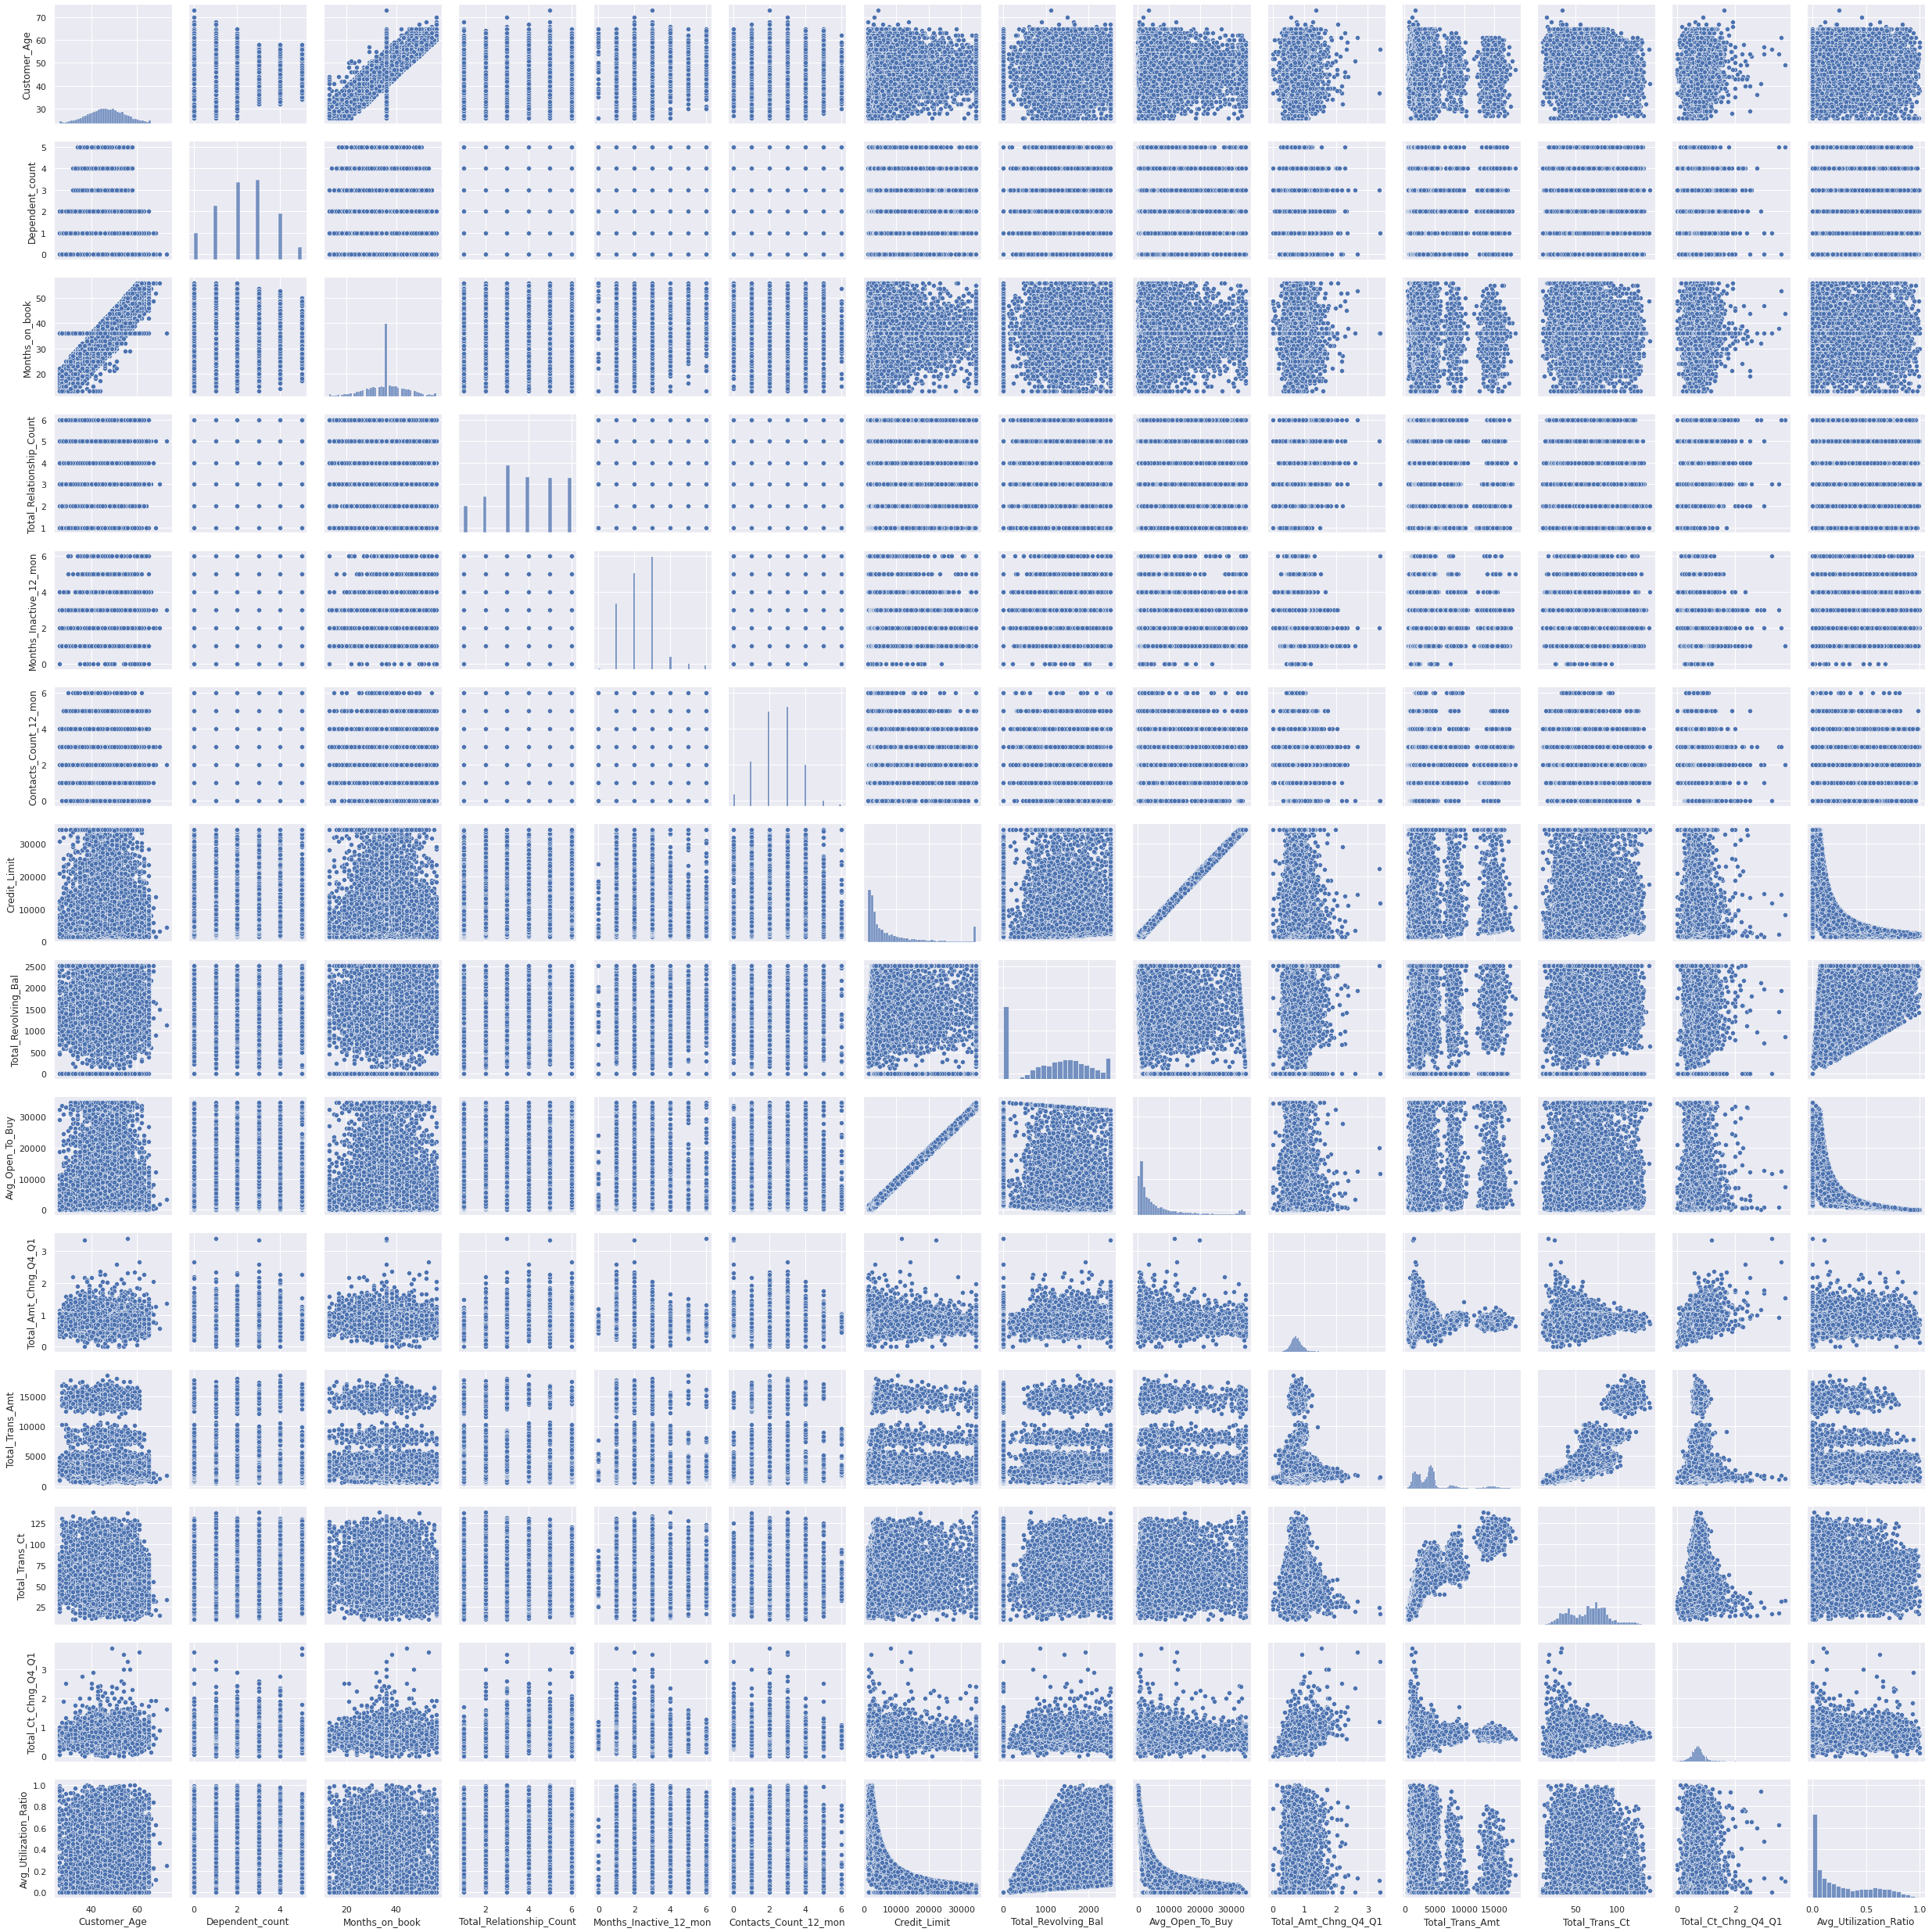

In [46]:
#The pairplots for the distributions.
sns.pairplot(Bank_D)

- From the relationship table above. We observe that Credit_Limit and Avg_Oen_To_Buy are higly correlated. There is need to drop one of this features later.
- Customer_Age and Month_On_Book potively correlated. Which means the number of months the customers have had the relationship with the customers depends on the age of the customers.

## **We explore further to know customers who are churned and who are not**


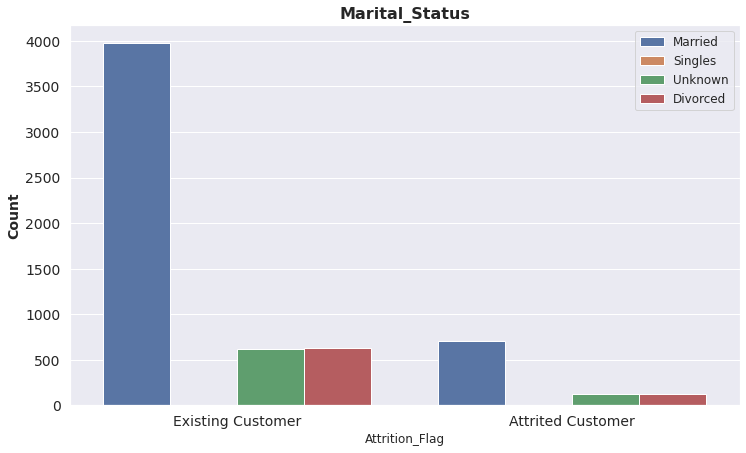

In [47]:
fig = plt.figure(figsize=[12,7]);
sns.countplot(data=Bank_D, x='Attrition_Flag', hue='Marital_Status', hue_order=['Married','Singles','Unknown','Divorced']);
sns.set(palette="nipy_spectral")
plt.xticks(fontsize=14);
#plt.xlabel('Attrition_Flag', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Marital_Status', fontsize=16, fontweight='bold');


- Many of the married customers are churned.
- Few of the customers who are singels are churned.

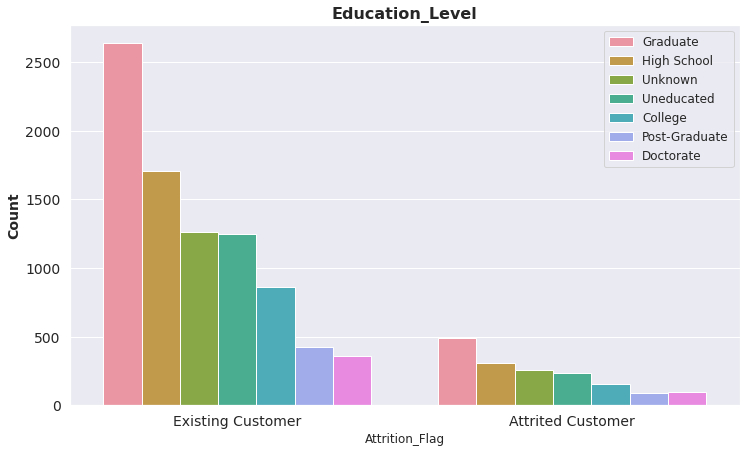

In [48]:
#Observation from educatonal_Level of the customers 
fig = plt.figure(figsize=[12,7]);
sns.countplot(data=Bank_D, x='Attrition_Flag', hue='Education_Level', hue_order=['Graduate', 
'High School',                                                                                
'Unknown',                                                                               
'Uneducated',
'College',          
'Post-Graduate',    
'Doctorate' ]);
sns.set(palette="nipy_spectral")
plt.xticks(fontsize=14);
#plt.xlabel('Attrition_Flag', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Education_Level', fontsize=16, fontweight='bold');


- Many of the graduates stills remain in the bank, while some of them are already churned. 
- Just few doctorate are churned.

In [49]:
#Checking the income category of the customers/
Bank_D['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

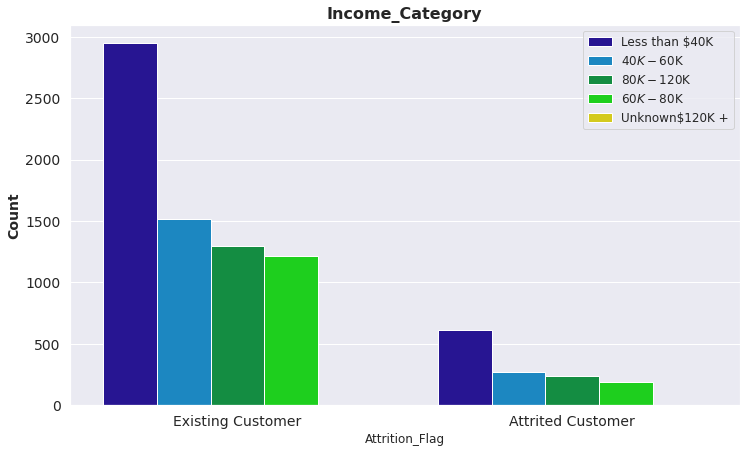

In [50]:
#Observation from the plot
ig = plt.figure(figsize=[12,7]);
sns.countplot(data=Bank_D, x='Attrition_Flag', hue='Income_Category', hue_order=['Less than $40K',
'$40K - $60K',       
'$80K - $120K',      
'$60K - $80K' ,      
'Unknown'           
'$120K +']);
sns.set(palette="nipy_spectral")
plt.xticks(fontsize=14);
#plt.xlabel('Attrition_Flag', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Income_Category', fontsize=16, fontweight='bold');



- Many customers with  annual income less that $40K are churners.

In [ ]:
#Checking the card category
Bank_D['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

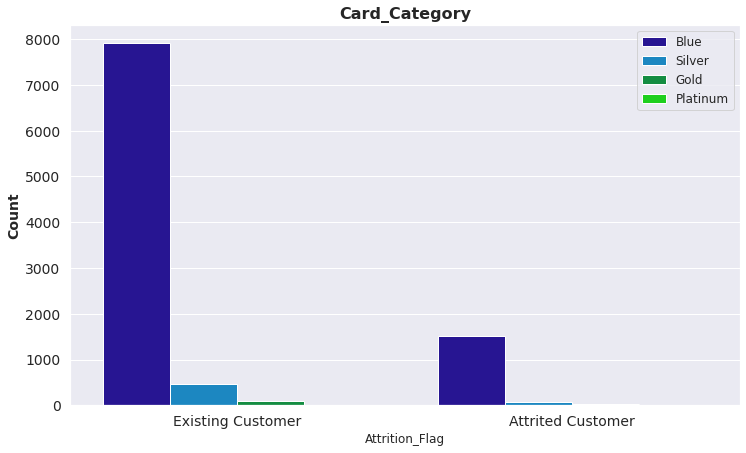

In [52]:
#Plot the card category 
fig = plt.figure(figsize=[12,7]);
sns.countplot(data=Bank_D, x='Attrition_Flag', hue='Card_Category', hue_order=['Blue',
'Silver',
'Gold',
'Platinum']);
sns.set(palette="nipy_spectral")
plt.xticks(fontsize=14);
#plt.xlabel('Attrition_Flag', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Card_Category', fontsize=16, fontweight='bold');


- Customers with blue cards are churners.
- Customers with Gold and Platinum cards are not likely to churn.

- 

### **Using the stacked plots to estimate the numbers of customers churned**

In [53]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, Bank_D["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, Bank_D["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


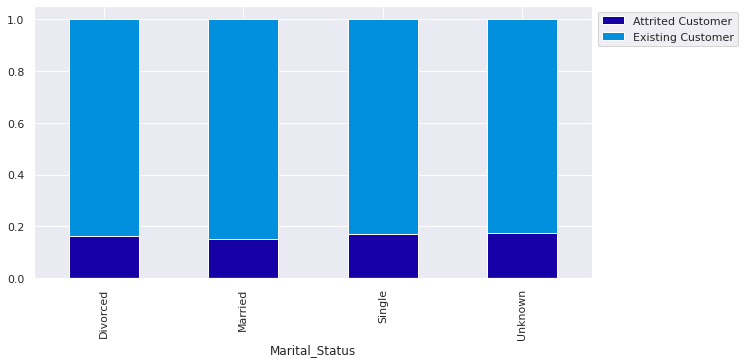

In [54]:
stacked_plot(Bank_D['Marital_Status'])

- About 709 married customers are churned.
- Divorced customershave the lowest values of churners.

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


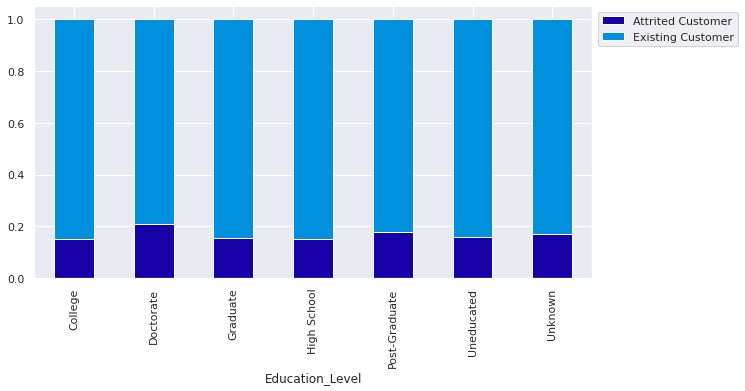

In [55]:
stacked_plot(Bank_D['Education_Level'])

- About 487 graduates  customers are churned.
- Divorced post-Graduate have the lowest values of churners which is 92.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


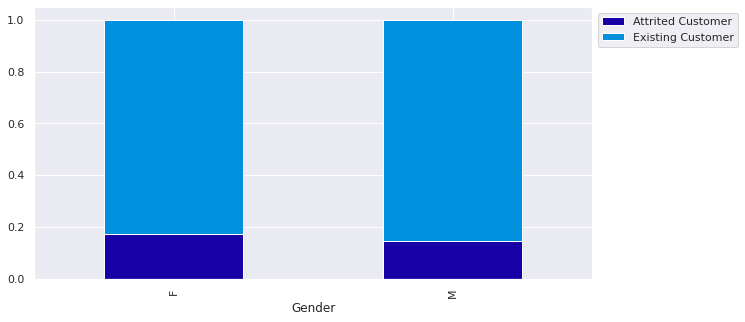

In [56]:
stacked_plot(Bank_D['Gender'])

- There are many more Female churners than the male.
- Numbers of male churners are 1627 and the female is 930.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


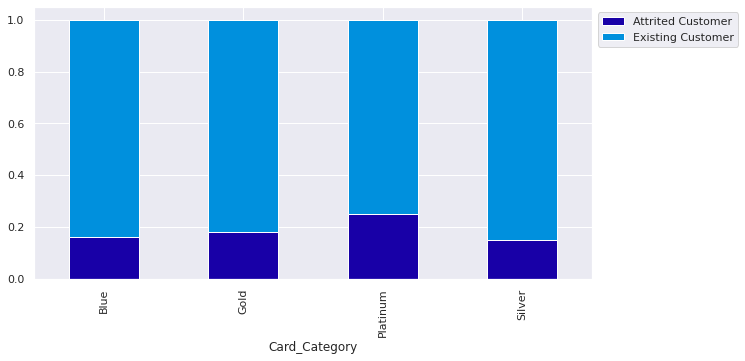

In [57]:
stacked_plot(Bank_D['Card_Category'])

- Customers with blue card are more churners than customers who are using - Platinum and silver.
- Blue card churners is 1519
- Silver 82
- Gold- 21
- platinum 5

 

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


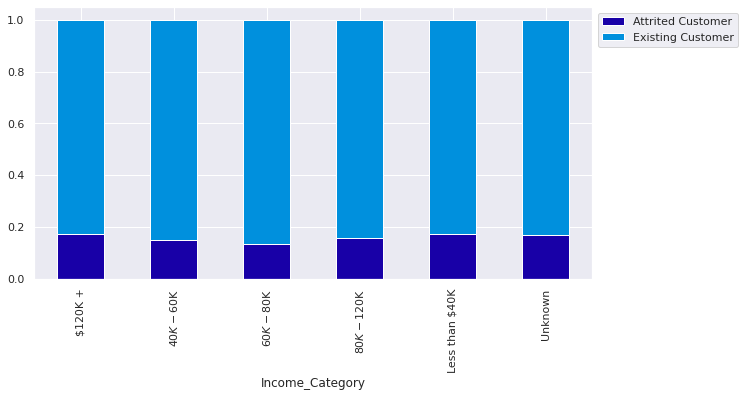

In [58]:
stacked_plot(Bank_D['Income_Category'])

- Customers with annual low income are churners than other customers which income more than 40k
- 612 customers with less than 40k annual income are churners.

In [59]:
#Printing the class dependent values.
Bank_D['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

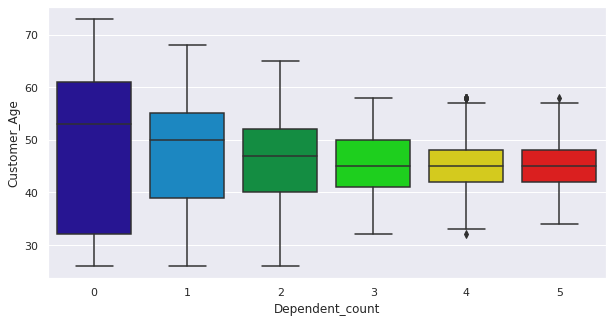

In [60]:
ax= sns.boxplot(x='Dependent_count', y= 'Customer_Age', data= Bank_D, orient='vertical')

- Many of the customers have 3 at least 3 dependent. Some have 4 and 5 dependent.
- Customers with zero dependent are between the age of 50 to and 55. Properly their children are capable to take good care of themselves.
- Many customers between age 40-45 has 4 to 5 dependent.

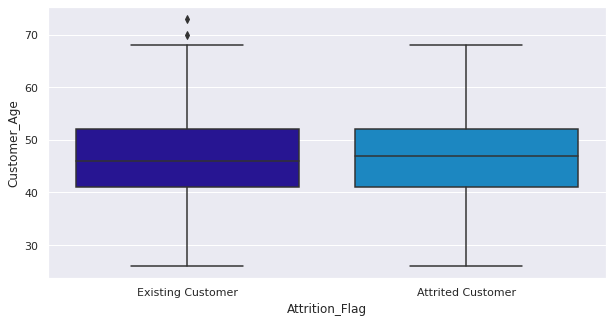

In [61]:
#Boxblox for attrition
ax= sns.boxplot(x='Attrition_Flag', y= 'Customer_Age', data= Bank_D, orient='vertical')

- Customers between age 40 and 50 are churners.

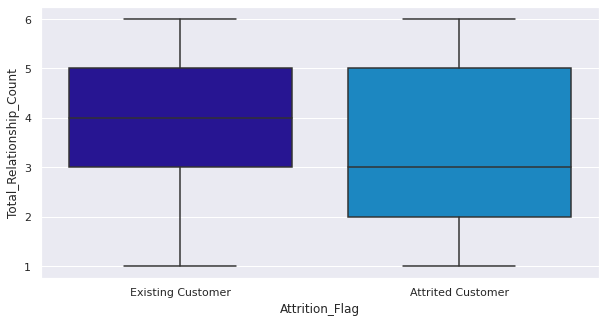

In [62]:
ax= sns.boxplot(x='Attrition_Flag', y= 'Total_Relationship_Count', data= Bank_D, orient='vertical')

- Customers who are churners are customers with 3 products.
- Most customers with 4 products are still remain in the bank

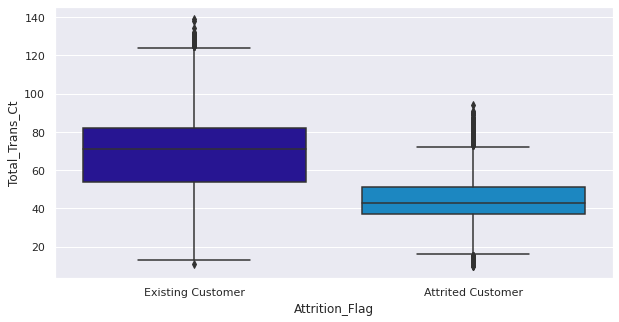

In [63]:
ax= sns.boxplot(x='Attrition_Flag', y= 'Total_Trans_Ct', data= Bank_D, orient='vertical')

- Customers that are churned are limited transaction with the bank in past few months.
- Existing customers have more transactions.

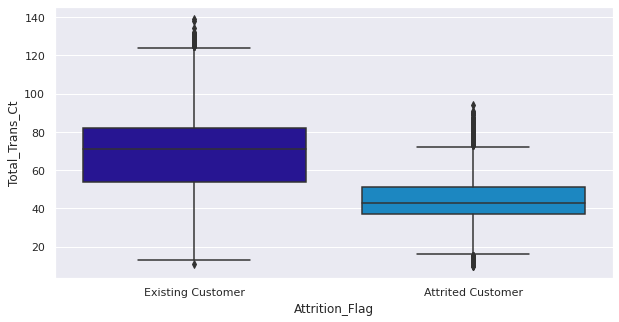

In [64]:
ax= sns.boxplot(x='Attrition_Flag', y= 'Total_Trans_Ct', data= Bank_D, orient='vertical')

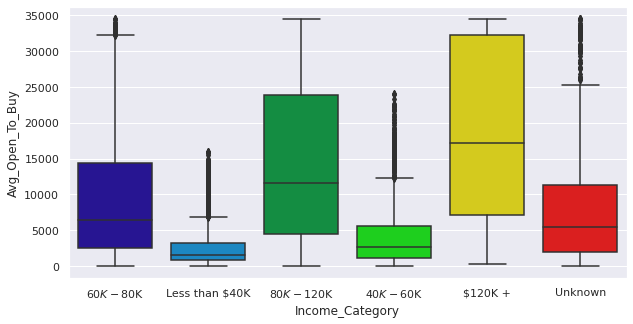

In [65]:
ax= sns.boxplot(x='Income_Category', y= 'Avg_Open_To_Buy', data= Bank_D, orient='vertical')

- Customers with low income are open to buy credit between 0 to 5000,
- While customers with higher annual income can buy a larger amount of credit.

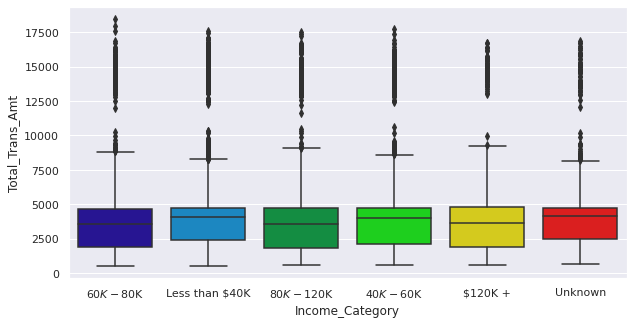

In [66]:
ax= sns.boxplot(x='Income_Category', y= 'Total_Trans_Amt', data= Bank_D, orient='vertical')

- Customers with less than 40k made so many transactionSin the last 12 month before they were churned.

**Plotting the relatinship plots**

<Figure size 864x504 with 0 Axes>

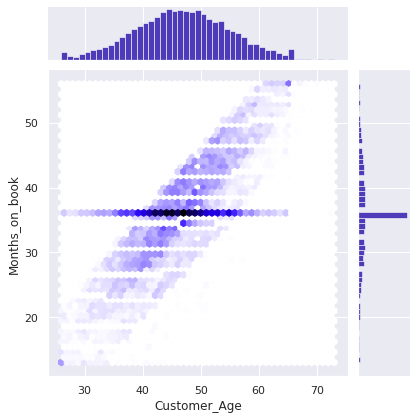

In [67]:
fig = plt.figure(figsize=[12,7])
sns.jointplot(x='Customer_Age',y='Months_on_book',data=Bank_D,kind='hex')

- This graph shows that the perod of relatinship of the customers with the bank is positively corrected with the custoemrs_age.

<Figure size 864x504 with 0 Axes>

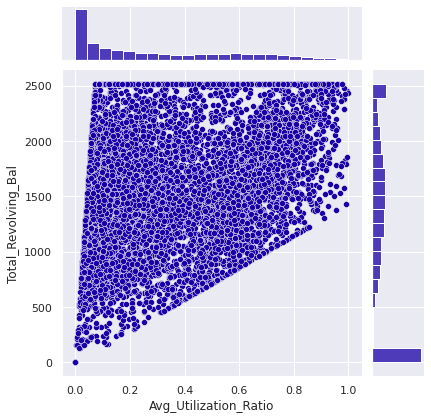

In [68]:
fig = plt.figure(figsize=[12,7])
sns.jointplot(y='Total_Revolving_Bal',x='Avg_Utilization_Ratio',data=Bank_D,kind='scatter')




- Correlattion graph between Total_Revolving_Bal and Avg_Utilization_Ratio.

##**Data Preparation**
Before we go into modelling we need drop any features that is not importance for our modelling. From our correlation matrix we see that Credit_Limit and Avg_Open_To_Buy are higly correlated, therefore we need to drop one of them.

In [69]:
#We need to drop Avg_Open_To_Buy column.

Bank_D.drop(columns=['Avg_Open_To_Buy'], inplace= True)

In [70]:
#Print the new dataset
Bank_D.head(5)

Attrition_Flag  Customer_Age  ... Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
0  Existing Customer            45  ...               1.625                  0.061
1  Existing Customer            49  ...               3.714                  0.105
2  Existing Customer            51  ...               2.333                  0.000
3  Existing Customer            40  ...               2.333                  0.760
4  Existing Customer            40  ...               2.500                  0.000

[5 rows x 19 columns]

In [71]:
#New dataset shape
Bank_D.shape

(10127, 19)

* Since we have dropped 2 features from our dataset, we have 19 remains.

##### **Converting features with datype Object to Category** 

In [72]:
#We convert features with data type object to categorigal data type
cols_with_obj_dtype = [var for var in Bank_D.columns if Bank_D[var].dtypes == 'object' ]

for col in cols_with_obj_dtype:
    Bank_D[col] = Bank_D[col].astype('category')

In [73]:
###Let's check our new datypes
Bank_D.dtypes

Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

In [74]:
# Separating features and the target columns into X and y variables
X = Bank_D.drop('Attrition_Flag', axis=1)
y = Bank_D['Attrition_Flag']

In [75]:
#Let's print X
X

Customer_Age Gender  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0                45      M  ...                1.625                 0.061
1                49      F  ...                3.714                 0.105
2                51      M  ...                2.333                 0.000
3                40      F  ...                2.333                 0.760
4                40      M  ...                2.500                 0.000
...             ...    ...  ...                  ...                   ...
10122            50      M  ...                0.857                 0.462
10123            41      M  ...                0.683                 0.511
10124            44      F  ...                0.818                 0.000
10125            30      M  ...                0.722                 0.000
10126            43      F  ...                0.649                 0.189

[10127 rows x 18 columns]

##**One-Hot-Encoding for all the categorical variables**

### **Creating a dummy variable for categorical datypes**

In [76]:
#W create dummies for the categorigal variable
Gender1=pd.get_dummies(X['Gender'],drop_first=True)
Education_Level1=pd.get_dummies(X['Education_Level'],drop_first=True)
Marital_Status1=pd.get_dummies(X['Marital_Status'],drop_first=True)
Income_Category1= pd.get_dummies(X['Income_Category'],drop_first=True)
Card_Category1= pd.get_dummies(X['Card_Category'],drop_first=True)


In [77]:
#We dropped the variables we didn't want.
X.drop(['Gender','Education_Level','Marital_Status', 'Income_Category', 'Card_Category'],axis=1,inplace=True)


In [78]:
#We concanate the new varaibles created by dummy into our data table.
X = pd.concat([X,Gender1,Education_Level1,Marital_Status1, Income_Category1, Card_Category1],axis=1)

In [79]:
#printing out the X values.
X

Customer_Age  Dependent_count  Months_on_book  ...  Gold  Platinum  Silver
0                45                3              39  ...     0         0       0
1                49                5              44  ...     0         0       0
2                51                3              36  ...     0         0       0
3                40                4              34  ...     0         0       0
4                40                3              21  ...     0         0       0
...             ...              ...             ...  ...   ...       ...     ...
10122            50                2              40  ...     0         0       0
10123            41                2              25  ...     0         0       0
10124            44                1              36  ...     0         0       0
10125            30                2              36  ...     0         0       0
10126            43                2              25  ...     0         0       1

[10127 rows x 31 columns]

In [80]:
#One encoder for y variables.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [81]:
print(y)

[1 1 1 ... 0 0 0]


In [82]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

**Features Scalling**

In [83]:
#We need to scale the X_train and y_train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Building Logistic Model**

### We need to defire metric and confusion matrix function before we start building our models

In [84]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [85]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Logistic Model**

In [ ]:
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

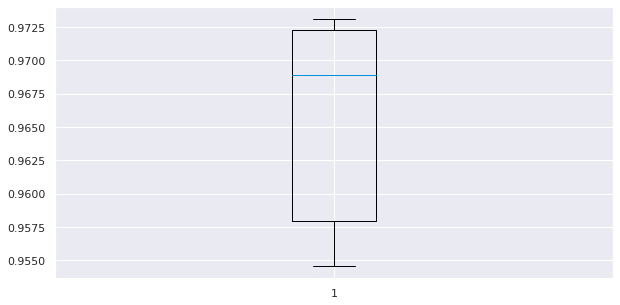

In [87]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

Accuracy on training set :  0.9077313769751693
Accuracy on test set :  0.9002961500493584
Recall on training set :  0.9667170953101362
Recall on test set :  0.964719717757742
Precision on training set :  0.9265345577573707
Precision on test set :  0.9203440538519072


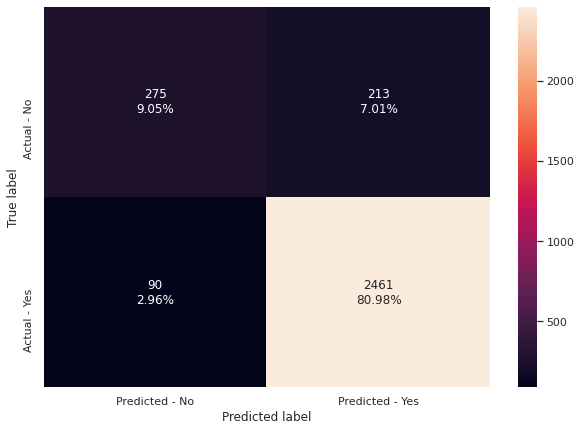

In [88]:
#Calculating different metrics
scores_LR = get_metrics_score(model,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(model,y_test)

 ### Insights from the confusion matrix :

- **True Positives:**
    - Number of customer that that are churned.
    - Model predicted: 9.05% that are churned.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did not churn.
    - Model predicted: The customer will NOT contribute to the steps that bank should take.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT churn.
    - Model predicted: The customer will contribute to revenue of the bank.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the revenue.

- **False Negatives:**
    - Reality: A customer are churned .
    - Model predicted: The customer will NOT contribute to revenue.
    - Outcome: The potential customer is missed.

###**Oversampling train data using SMOTE**



In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 5949
Before UpSampling, counts of label 'No': 1139 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 31)
After UpSampling, the shape of train_y: (11898,) 



### Logistic Regression on oversampled data

In [91]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

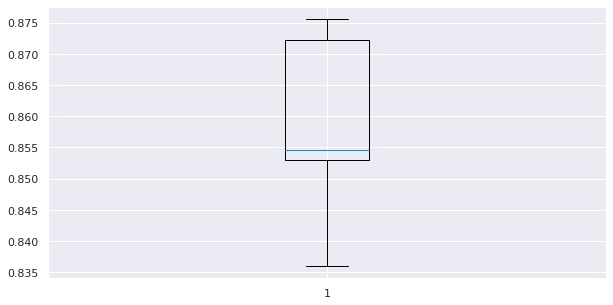

In [92]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

Accuracy on training set :  0.8679610018490502
Accuracy on test set :  0.8585060875287923
Recall on training set :  0.8594721801983527
Recall on test set :  0.8624068992551941
Precision on training set :  0.8743160054719562
Precision on test set :  0.9653356735410268


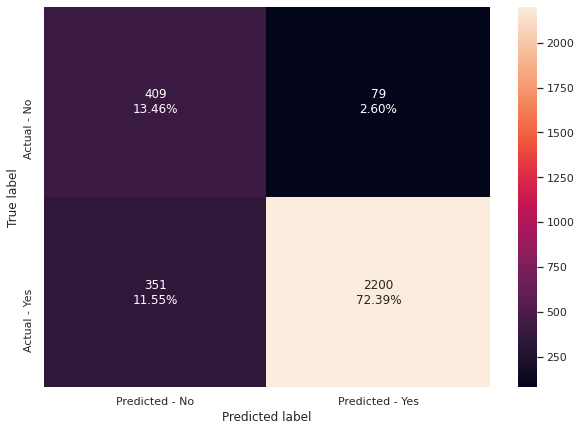

In [93]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

### Regularization

In [94]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy on training set :  0.8683812405446294
Accuracy on test set :  0.8585060875287923
Recall on training set :  0.8599764666330476
Recall on test set :  0.8624068992551941
Precision on training set :  0.8746794323816037
Precision on test set :  0.9653356735410268


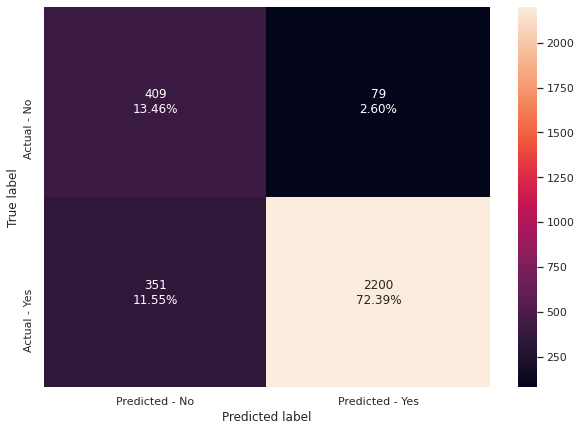

In [95]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

### Undersampling train data using SMOTE

In [96]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [97]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5949
Before Under Sampling, counts of label 'No': 1139 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 31)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [98]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

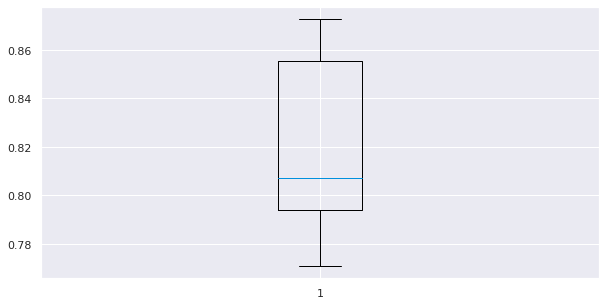

In [99]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

Accuracy on training set :  0.8402107111501317
Accuracy on test set :  0.8519249753208292
Recall on training set :  0.8349429323968394
Recall on test set :  0.8541748333986672
Precision on training set :  0.8438331854480923
Precision on test set :  0.9654408506867523


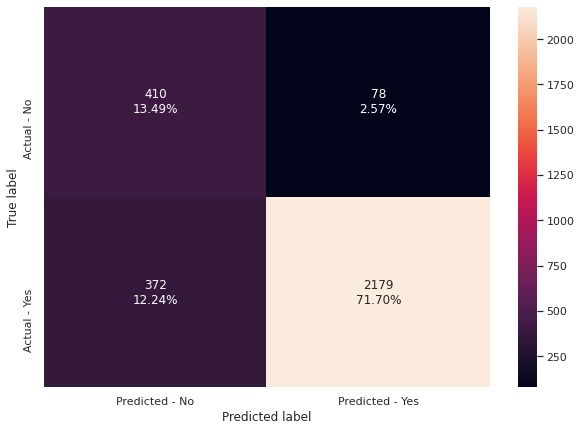

In [100]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

In [101]:
# defining list of model
models = [model]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [102]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [103]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [104]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

Model  ...  Test_Precision
0                                Logistic Regression  ...        0.920344
1            Logistic Regression on Oversampled data  ...        0.965336
2  Logistic Regression-Regularized (Oversampled d...  ...        0.965336
3           Logistic Regression on Undersampled data  ...        0.965441

[4 rows x 7 columns]

* city_developement_index: For a one-unit increase in the city development index, we expect to see about a 109% decrease in the odds of a person looking for a job change.

* training_hours: For a one-unit increase in the training hours, we expect to see about a 0.06% decrease in the odds of a person looking for a job change.

* city - developing/developed: The odds of a person who is from a developing city looking for a job change is 355% lower than a person who is from an under-developed city. Similarly, The odds of a person who is from a developed city looking for a job change is 305% lower than a person who is from an under-developed city. (keeping under-developed cities as a reference).

* gender - male/other -  The odds of a male looking for a job change is 4% lower than a female. Similarly, The odds of a person from 'other' gender looking for a job change is 37% higher than a female. (keeping females as a reference).

* relevent experience - No relevant experience: The odds of a person who has no relevant job experience looking for a job change is 65% higher than a person who has some relevant experience.

`Interpretation for other attributes can be made in a similar fashion.`

##**Modeling with Boosting** 

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validator` provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [105]:
#import pandas as pd
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
# Libraries to tune model, get different metric scores, and split data
#from sklearn import metrics
#from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#from sklearn.impute import KNNImputer
#from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import (
    #AdaBoostClassifier,
    #GradientBoostingClassifier,
    #RandomForestClassifier)
#from xgboost import XGBClassifier

In [106]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 96.53705182661795
RF: 98.82331738414457
GBM: 98.85693082952272
ADB: 98.13401559109766
XGB: 98.99139874621001
DTREE: 95.89836809408374


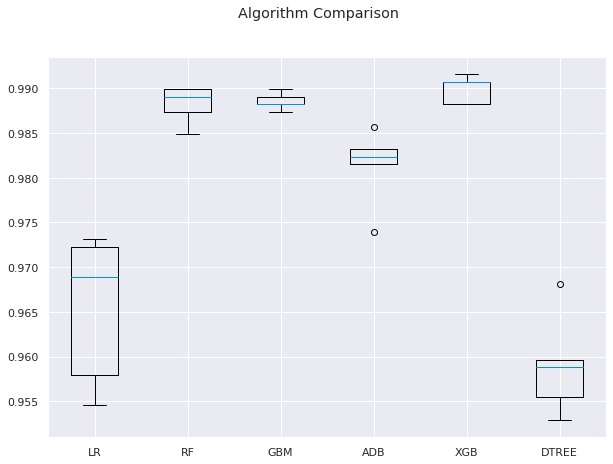

In [107]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## **Hyperparameter Tuning**

We will use pipelines with StandardScaler and  AdaBoost model and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.

We can also use make_pipeline function instead of Pipeline to create a pipeline.

make_pipeline`: This is a shorthand for the Pipeline constructor; it does no`t require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

**Hyperparameter tuning using GridSearch**

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [108]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [109]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **AdaBoost**

### **GridSearchCV**

In [111]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'), 'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 10} 
Score: 1.0
CPU times: user 8min 23s, sys: 3.99 s, total: 8min 27s
Wall time: 8min 25s


In [112]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=2,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                      

In [ ]:

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

In [113]:
# Calculating different metrics
get_metrics_score(abc_tuned1)
#get_metrics_score(abc_tuned1,X_train_un,X_test,y_train_un,y_test)
#get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)
#abc_tuned1

Accuracy on training set :  0.9973194130925508
Accuracy on test set :  0.9628167160250082
Recall on training set :  0.9988233316523786
Recall on test set :  0.982359858878871
Precision on training set :  0.9979845482028888
Precision on test set :  0.9735819735819736


[0.9973194130925508,
 0.9628167160250082,
 0.9988233316523786,
 0.982359858878871,
 0.9979845482028888,
 0.9735819735819736]

##RandomizedSearchCV




In [114]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 50, 'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')} with CV score=1.0:
CPU times: user 2min 55s, sys: 1.16 s, total: 2min 56s
Wall time: 2min 55s


In [ ]:
# Creating new pipeline with best parameters
#xgb_tuned2 = Pipeline(
    #steps=[
       # ("scaler", StandardScaler()),
        #(
            #"XGB",
            #XGBClassifier(
               # random_state=1,
                #n_estimators=200,
               # scale_pos_weight=10,
               # gamma=1,
               # subsample=0.9,
               # learning_rate= 0.01,
              #  eval_metric='logloss', max_depth = 2, reg_lambda = 2
           # ),
     #  ),
  #  ]
#)
# Fit the model on training data
#xgb_tuned2.fit(X_train, y_train)

## XGBoost

### GridSearchCV

In [116]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.9} with CV score=1.0:
CPU times: user 1h 30min 18s, sys: 15.6 s, total: 1h 30min 33s
Wall time: 1h 30min 10s


In [117]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, learning_rate=0.01, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=None,
                               n_estimators=50, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               seed=None, silent=None, subsample=0.9,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.8532731376975169
Accuracy on test set :  0.855544587035209
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8511947345829161
Precision on test set :  0.8531772575250837


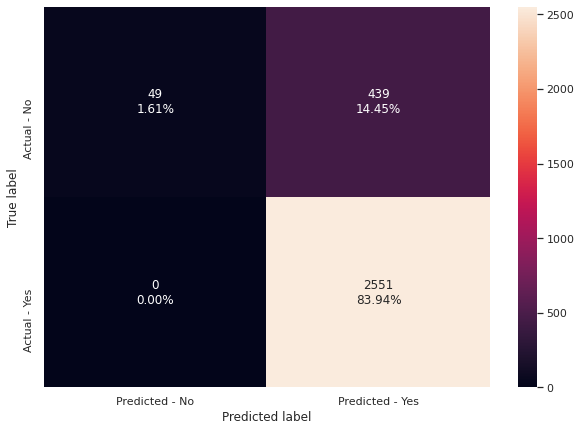

In [118]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

### RandomizedSearchCV

In [119]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 3} with CV score=1.0:
CPU times: user 4min 27s, sys: 778 ms, total: 4min 28s
Wall time: 4min 27s


In [120]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.01,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, learning_rate=0.01, max_delta_step=0,
                               max_depth=2, min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               seed=None, silent=None, subsample=0.9,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.850451467268623
Accuracy on test set :  0.847318196775255
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8487658724497075
Precision on test set :  0.8461028192371476


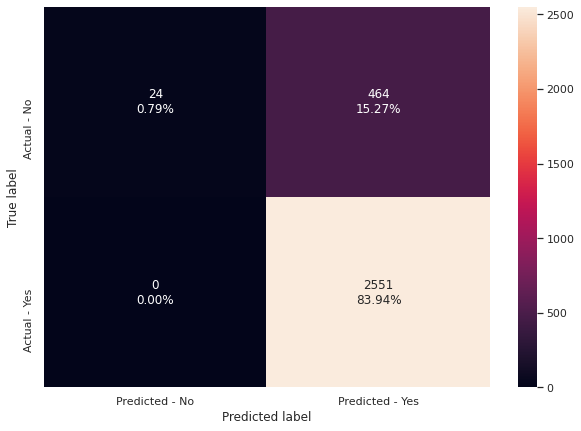

In [121]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

##**Comparing all models**

In [122]:
# defining list of models
models = [abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [123]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  ...  Test_Precision
1  Decision Tree with RandomizedSearchCV  ...        0.839421
2              XGBoost with GridSearchCV  ...        0.853177
3        XGBoost with RandomizedSearchCV  ...        0.846103
0        Decision Tree with GridSearchCV  ...        0.973582

[4 rows x 7 columns]

##**Building Model with Bagging**

In [127]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 96.53705182661795
RF: 98.82331738414457
GBM: 98.85693082952272
ADB: 98.13401559109766
XGB: 98.99139874621001
DTREE: 95.89836809408374


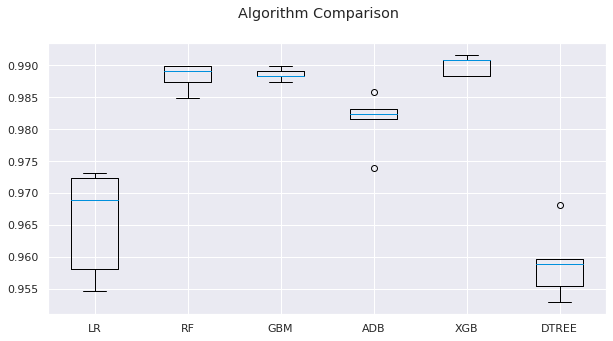

In [128]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

# **Hyperparameter Tuning**
We will use pipelines with StandardScaler and  AdaBoost model and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

We can also use make_pipeline function instead of Pipeline to create a pipeline.

make_pipeline`: This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.**

Fist let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [129]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [130]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree

### GridSearchCV

In [131]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_split': 2} 
Score: 0.9805010919422438


In [132]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, min_samples_split=4),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=4,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=1,
                                        splitter='best'))],
         verbose=False)

Accuracy on training set :  0.9968961625282167
Accuracy on test set :  0.9368213228035538
Recall on training set :  0.9966380904353673
Recall on test set :  0.9635437083496668
Precision on training set :  0.9996627887371439
Precision on test set :  0.9612827532264372


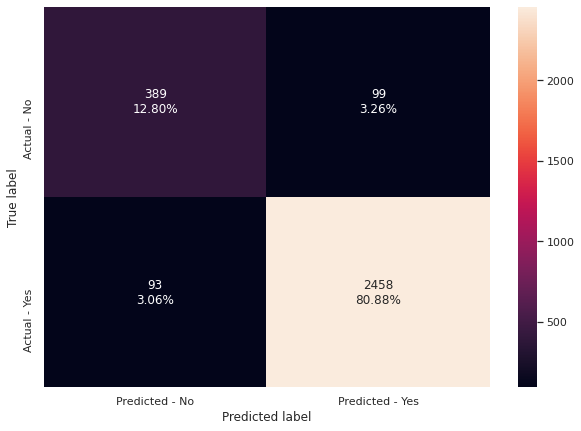

In [133]:
# Calculating different metrics
get_metrics_score(dtree_tuned1)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

### RandomizedSearchCV

In [134]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    
     "decisiontreeclassifier__criterion": ['gini','entropy'],
    "decisiontreeclassifier__max_depth": [3, 4, 5, None],
    "decisiontreeclassifier__min_samples_split": [2,4,7,10,15]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_split': 7, 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__criterion': 'entropy'} with CV score=0.9805010919422438:


In [135]:
# Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, min_samples_split=7),
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=7,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=1,
                                        splitter='best'))],
         verbose=False)

Accuracy on training set :  0.989841986455982
Accuracy on test set :  0.9410990457387298
Recall on training set :  0.99075474869726
Recall on test set :  0.9635437083496668
Precision on training set :  0.99712400609034
Precision on test set :  0.9661949685534591


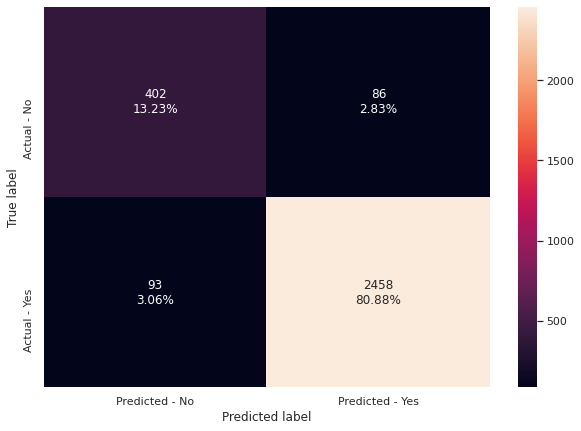

In [136]:
# Calculating different metrics
get_metrics_score(dtree_tuned2)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

## XGBoost

### GridSearchCV

In [137]:
# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.9} with CV score=1.0:


In [138]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=3,
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, learning_rate=0.01,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=50, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               seed=None, silent=None, subsample=0.9,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.8532731376975169
Accuracy on test set :  0.855544587035209
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8511947345829161
Precision on test set :  0.8531772575250837


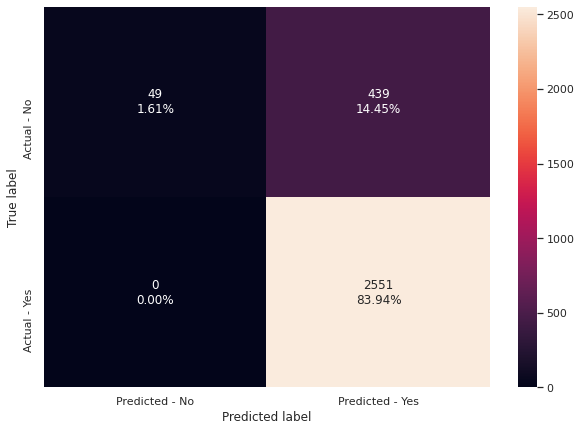

In [139]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

### RandomizedSearchCV

In [140]:
#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 5} with CV score=1.0:


In [141]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=20,
                scale_pos_weight=10,
                learning_rate=0.01,
                gamma=1,
                subsample=0.9,
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, learning_rate=0.01,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=20, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               seed=None, silent=None, subsample=0.9,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.8532731376975169
Accuracy on test set :  0.855544587035209
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.8511947345829161
Precision on test set :  0.8531772575250837


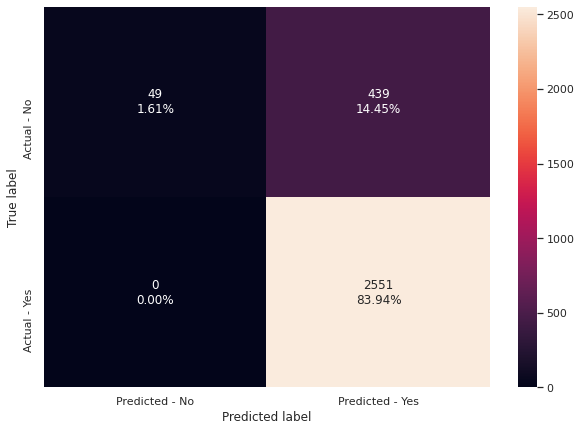

In [142]:
 #Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

### Comparing models from GridsearchCV and RandomisedsearchCV

In [143]:
# defining list of models
models = [xgb_tuned1, xgb_tuned2, dtree_tuned1, dtree_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [144]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "XGBoost tuned with GridSearchCV",
            "XGBoost tuned with RandomizedSearchCV",
            "Decision tree tuned with GridSearchCV",
            "Decision tree tuned with RandomizedSearchCV"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  ...  Test_Precision
0              XGBoost tuned with GridSearchCV  ...        0.853177
1        XGBoost tuned with RandomizedSearchCV  ...        0.853177
2        Decision tree tuned with GridSearchCV  ...        0.961283
3  Decision tree tuned with RandomizedSearchCV  ...        0.966195

[4 rows x 7 columns]